# MLFlow com Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

In [2]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

## Transformações e Separação das Variáveis

In [3]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = credito[col].astype('category').cat.codes

In [4]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [5]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=42)

## Treinando o Modelo

In [10]:
def rf_train(n_estimators):
    mlflow.set_experiment("rfexperimento")
    with mlflow.start_run():
        modelorf = RandomForestClassifier(n_estimators=n_estimators)
        modelorf.fit(X_treinamento, y_treinamento)
        previsoes = modelorf.predict(X_teste)

        # Log de hiperparametros
        mlflow.log_param("n_estimators", n_estimators)

        # Métricas
        acuracia = accuracy_score(y_teste, previsoes)
        recall = recall_score(y_teste, previsoes)
        precision = precision_score(y_teste, previsoes)
        f1 = f1_score(y_teste, previsoes)
        auc= roc_auc_score(y_teste, previsoes)
        log = log_loss(y_teste, previsoes)

        # Registrar Métricas
        mlflow.log_metric("acuracia",acuracia)
        mlflow.log_metric("recall",recall)
        mlflow.log_metric("precision",precision)
        mlflow.log_metric("f1",f1)
        mlflow.log_metric("auc",auc)
        mlflow.log_metric("log",log)    

        # Gráficos
        confusion = ConfusionMatrixDisplay.from_estimator(modelorf, X_teste, y_teste)
        plt.savefig("confusionrf.png")
        roc = RocCurveDisplay.from_estimator(modelorf, X_teste, y_teste)
        plt.savefig("rocrf.png")

        # Logar Gráficos
        mlflow.log_artifact("confusionrf.png")
        mlflow.log_artifact("rocrf.png")      

        # Modelo
        mlflow.sklearn.log_model(modelorf,"ModeloRF")

        # Informações de Execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)   

    mlflow.end_run()

2025/02/04 11:13:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  f182af0750a143fb9d79ef60b9c6d5b2


2025/02/04 11:13:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  d2c81e7a057a47398418f3a496854161


2025/02/04 11:14:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  7f8f63f23a584f399c12e855a322b74d


2025/02/04 11:14:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  79f293d7edf9433a916c3a12d6bc3e06


2025/02/04 11:14:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  34c6a33a123448d2995b6987bdd18300


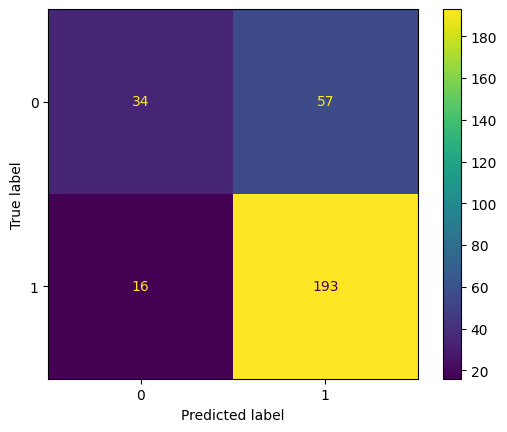

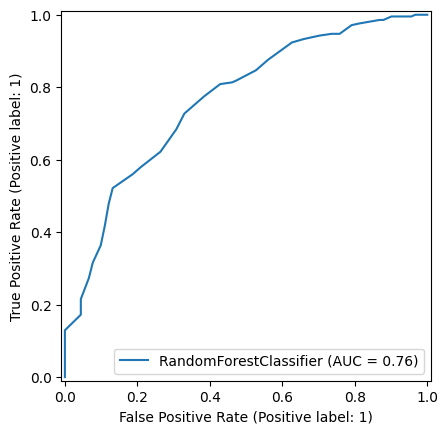

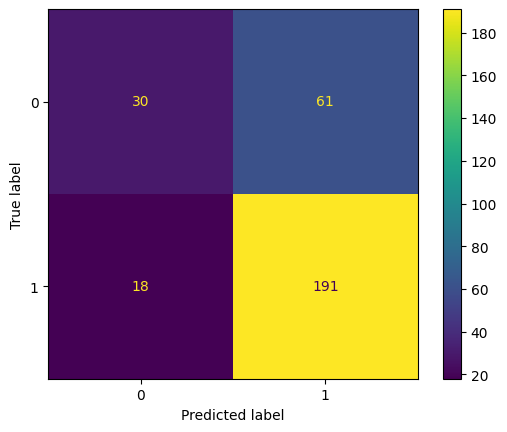

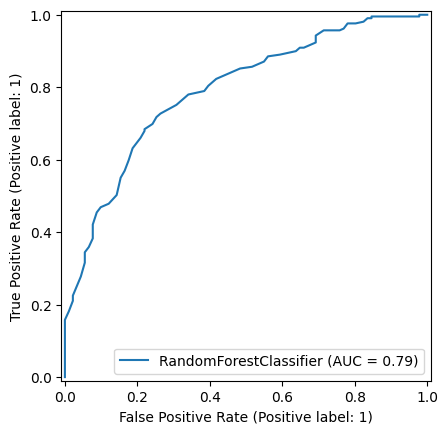

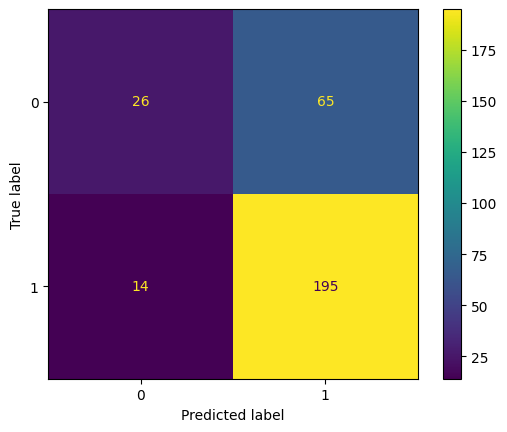

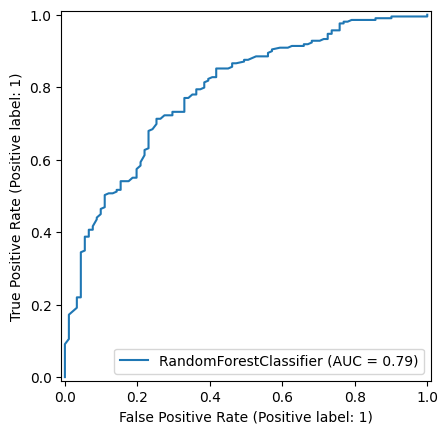

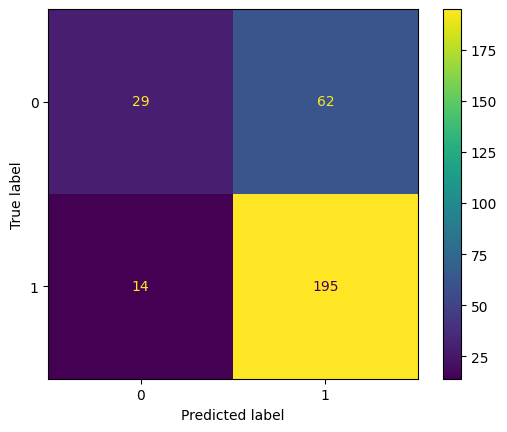

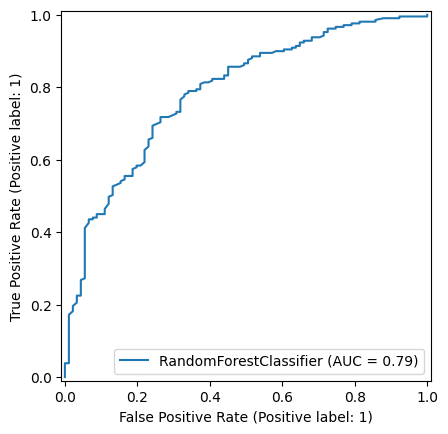

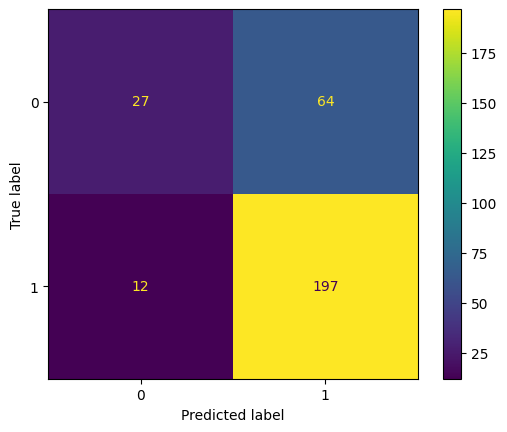

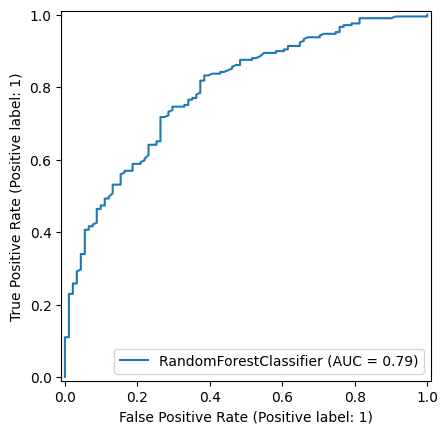

In [11]:
# Executando
arvores = [50,100,500,750,1000]
for n in arvores:
    rf_train(n)